# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import os
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
print('PyTorch Version:', torch.__version__)
from torchsummary import summary
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

PyTorch Version: 1.0.0


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name=os.path.normpath("./twenty_agents/Reacher_Linux_NoVis/Reacher.x86_64"))

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
print('States is of type: ', type(states))
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
States is of type:  <class 'numpy.ndarray'>
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
step = 0
while True:
    step += 1
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    print('\rStep: {}\tAveraged score: {:.2f}'.format(step, np.mean(scores)), end="")
    dones = env_info.local_done                        # see if episode finished
    states = next_states                               # roll over states to next time step
    scores += env_info.rewards                         # update the score (for each agent)
    if np.any(dones):                                  # exit loop if episode finished
        break
print('\nAverage score (random actions) for this episode: {:.2f} (Min score: {:.2f}, Max score: {:.2f}, Score std: {:.2f})'.format(
    np.mean(scores), np.min(scores), np.max(scores), np.std(scores)))

Step: 1001	Averaged score: 0.13
Average score (random actions) for this episode: 0.13 (Min score: 0.00, Max score: 0.81, Score std: 0.22)


When finished, you can close the environment.

```python
env.close()
```

### 4. Train a Deep Deterministic Policy Gradients (DDPG) agent

#### Algorithm Description
This environment is solved using the Deep Deterministic Policy Gradients (DDPG) algorithm. [This article](https://towardsdatascience.com/deep-deterministic-policy-gradients-explained-2d94655a9b7b) is a good resource for DDPG.

Below shows the basic implementation pseudo-code of DDPG, taken from the original DDPG paper "[Continuous Control With Deep Reinforcement Learning](https://arxiv.org/abs/1509.02971)"(Lillicrap et al, 2015):
![DDPG Algorithm](ddpg.png)

#### Below describes the network architectures of the Actor and Critic networks:
```
Actor network:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
================================================================
            Linear-1                  [-1, 400]          13,600
       BatchNorm1d-2                  [-1, 400]             800
            Linear-3                  [-1, 300]         120,300
            Linear-4                    [-1, 4]           1,204
================================================================
Total params: 135,904
Trainable params: 135,904
Non-trainable params: 0

----------------------------------------------------------------

Critic network:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
================================================================
            Linear-1                  [-1, 400]          13,600
       BatchNorm1d-2                  [-1, 400]             800
            Linear-3                  [-1, 300]         121,500
            Linear-4                    [-1, 1]             301
================================================================
Total params: 136,201
Trainable params: 136,201
Non-trainable params: 0
```

#### The hyperparameters are defined as follows:
```
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 1024       # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-3         # learning rate of the actor
LR_CRITIC = 1e-3        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay
TRAIN_EVERY = 5         # how often to train a batch
TRAIN_STEPS = 3         # how many training steps when a batch is trained
```

#### Implementation tricks:
At the very beginning I followed [Benchmark Implementation](https://classroom.udacity.com/nanodegrees/nd893/parts/286e7d2c-e00c-4146-a5f2-a490e0f23eda/modules/089d6d51-cae8-4d4b-84c6-9bbe58b8b869/lessons/5b822b1d-5c89-4fd5-9b52-a02ddcfd3385/concepts/59c1f0b0-589a-43a5-ae27-fcb7f5a25e08) to design the algorithm.

Most of the advises are quite fruitful, except that I commented out the **Attempt 3** which restricts the norm of the gradients to 1 when updating the weights of the Critic network. Instead, I plugged in one `nn.BatchNorm1d` layer after the first `nn.Linear` layer for both Actor and Critic to reduce ill effects of the internal covariance shift within the networks. By such means I can increase the learning rate to 1e-3 for both networks to accelerate the training process.

Also, I updated both networks 3 times after every 5 steps. By combining such efforts, I can achieve the goal that the agent is able to receive an average reward (over 100 episodes, and over all 20 agents) of at least 30.

Furthermore, in order to deal with the exploration-exploitation trade-off, I introduced a value of $\epsilon$ during training and the Ornstein–Uhlenbeck noise will be added to `actions` with probability $\epsilon$. This is a strategy similar to $\epsilon$-greedy policies. The probability $\epsilon$ is decayed by 1e-5 per step until it reaches its lower bound 0.05.

#### Define the agent training function

In [6]:
def train_ddpg(env, agent, save_model_actor, save_model_critic,
               n_episodes=2000, eps_start=1.0, eps_end=0.05, eps_decay=1e-5,
               deque_len=100, print_every=20, finish_threshold=30.0):
    """Deep Deterministic Policy Gradients (DDPG)
    
    Params
    ======
        env: environment
        agent: DDPG agent
        save_model_actor: actor model filename for saving
        save_model_critic: critic model filename for saving
        n_episodes (int): maximum number of training episodes
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): subtractive factor (per step) for decreasing epsilon
        deque_len (int): length of score deque
        print_every (int): print a new line of scores after such number of episodes
        finish_threshold (float): the training process will finish if the average score is larger than such threshold
    """
    scores_deque = deque(maxlen=deque_len)
    scores_min = []
    scores_max = []
    scores_mean = []
    scores_std = []
    scores_movingmean = []
    eps = eps_start
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        scores = np.zeros(num_agents)
        step = 0
        while True:
            step += 1
            use_noise = (random.random() <= eps)
            actions = agent.act(states, add_noise=use_noise)
            eps = max(eps - eps_decay, eps_end)
            # actions = np.clip(actions, -1, 1)  # has done by agent.act
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            scores += rewards
            if np.any(dones):
                break 
        scores_deque.append(scores)
        scores_min.append(np.min(scores))
        scores_max.append(np.max(scores))
        scores_mean.append(np.mean(scores))
        scores_std.append(np.std(scores))
        scores_movingmean.append(np.mean(scores_deque))
        print('\rEpisode {}:\tMoving average score: {:.2f}\tMean score: {:.2f} (Min score: {:.2f}, Max score: {:.2f}, Score std: {:.2f})'.format(
            i_episode, scores_movingmean[-1], scores_mean[-1], scores_min[-1], scores_max[-1], scores_std[-1]), end="")
        if i_episode % print_every == 0:
            print('\rEpisode {}:\tMoving average score: {:.2f}'.format(i_episode, scores_movingmean[-1]))  
        if scores_movingmean[-1] >= finish_threshold:  # save the model
            print('\nEnvironment solved in {:d} episodes!\tMoving average score: {:.2f}'.format(i_episode-deque_len, scores_movingmean[-1]))
            torch.save(agent.actor_local.state_dict(), save_model_actor)
            torch.save(agent.critic_local.state_dict(), save_model_critic)
            break
             
    return scores_mean, scores_movingmean

### 5. DDPG training

#### 5.1. Train the agent

In [7]:
from agent_ddpg import Agent

agent = Agent(num_agents, state_size, action_size, random_seed=0)

# print the network summary
print('Actor network:')
summary(agent.actor_local, (state_size,))
print('\nCritic network:')
summary(agent.critic_local, [(state_size,), (action_size,)])

scores_mean, scores_movingmean = train_ddpg(env, agent, 'model_actor_ddpg.pt', 'model_critic_ddpg.pt')

Actor network:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]          13,600
       BatchNorm1d-2                  [-1, 400]             800
            Linear-3                  [-1, 300]         120,300
            Linear-4                    [-1, 4]           1,204
Total params: 135,904
Trainable params: 135,904
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.52
Estimated Total Size (MB): 0.53
----------------------------------------------------------------

Critic network:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]          13,600
       BatchNorm1d-2                  [-1, 400]             800
         

#### 5.2. Plot the training score curve

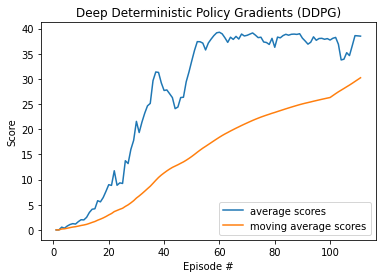

In [8]:
plt.figure()
plt.plot(np.arange(1, len(scores_mean)+1), scores_mean,
         label='average scores')
plt.plot(np.arange(1, len(scores_movingmean)+1), scores_movingmean,
         label='moving average scores')
plt.legend()
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Deep Deterministic Policy Gradients (DDPG)')
plt.show()

#### 5.3. Test the trained DDPG agent

In [9]:
# load the weights from the saved checkpoint files
agent.actor_local.load_state_dict(torch.load('model_actor_ddpg.pt'))
agent.critic_local.load_state_dict(torch.load('model_critic_ddpg.pt'))

# test the trained agent
env_info = env.reset(train_mode=False)[brain_name]  
states = env_info.vector_observations
scores = np.zeros(num_agents)
step = 0
while True:
    step += 1
    actions = agent.act(states, add_noise=False)
    env_info = env.step(actions)[brain_name]
    next_states = env_info.vector_observations
    rewards = env_info.rewards
    print('\rStep: {}\tAverage score: {:.2f}'.format(step, np.mean(scores)), end="")
    dones = env_info.local_done
    states = next_states
    scores += env_info.rewards
    if np.any(dones):
        break
print('\nAverage score (after DDPG learning) for this episode: {:.2f} (Min score: {:.2f}, Max score: {:.2f}, Score std: {:.2f})'.format(
    np.mean(scores), np.min(scores), np.max(scores), np.std(scores)))

Step: 1001	Average score: 38.40
Average score (after DDPG learning) for this episode: 38.44 (Min score: 35.56, Max score: 39.69, Score std: 1.37)


### 6. Close the environment

In [10]:
env.close()